<a href="https://colab.research.google.com/github/Meliodas98765/NLP-Project-sentiment_analyzer/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [ ]:
boston = datasets.load_boston(False)

In [ ]:
X,y = boston.data,boston.target

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

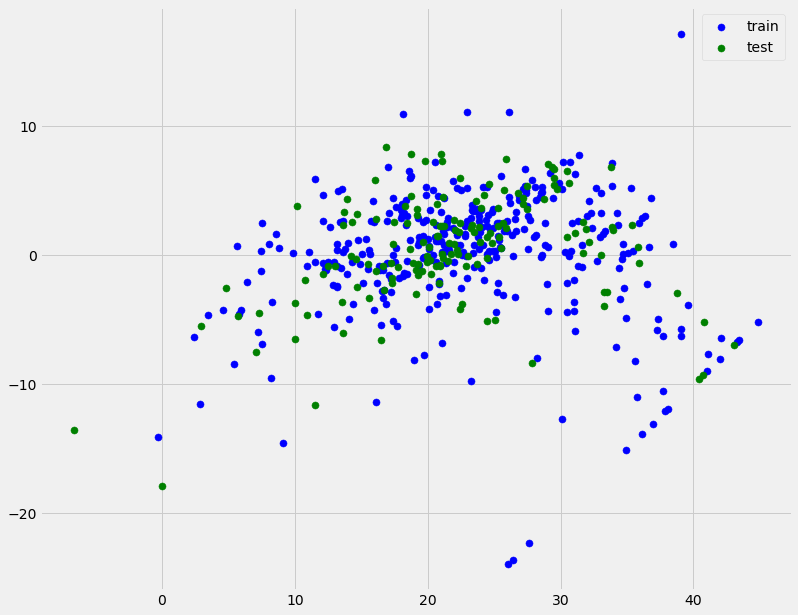

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (12,10))

plt.scatter(reg.predict(X_train),reg.predict(X_train)-y_train,color = "blue",s=50, label = "train")
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test, color = "green",s=50, label = "test")

plt.legend()
plt.show()

In [ ]:
from sklearn import preprocessing

In [ ]:
log_reg = linear_model.LogisticRegression()

In [ ]:
log_reg.fit(X_train,y_train)

print("Variance {}".format(log_reg.score(X_test,y_test)))

Variance 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


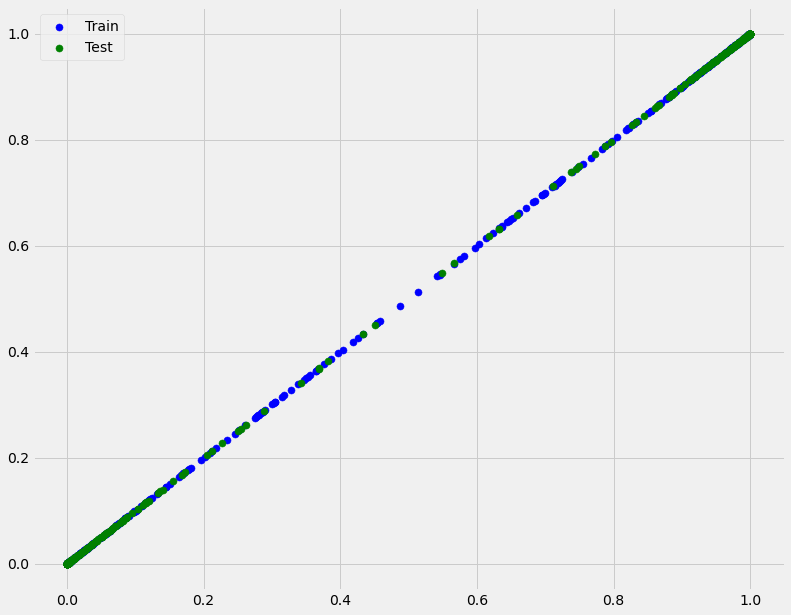

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize= (12,10))

plt.scatter(log_reg.predict_proba(X_train),log_reg.predict_proba(X_train), s = 50,color = "blue", label = "Train")
plt.scatter(log_reg.predict_proba(X_test),log_reg.predict_proba(X_test), color = "green", s = 50, label = "Test")

plt.legend()
plt.show()

In [ ]:
log_reg_ = linear_model.LogisticRegressionCV()

In [ ]:
log_reg_.

In [ ]:
X,y = datasets.load_breast_cancer(True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.35, random_state = 42)

In [ ]:
reg_cancer = linear_model.

---
##Sentiment Analysis
---

### Data

In [ ]:
import nltk
nltk.download("all")

In [ ]:
paragraph = """Who couldn’t use a few of the best motivational speeches for entrepreneurs?

Business can be hard. Heck, life can be hard.

We’re all on a journey, and we’ve all been down in the dumps before, wondering if what we’re doing is really worth it.

Wondering if what we’re doing is really making an impact.

But, it’s important that we’re always moving forward. This is a lesson that I learned early in life.

I remember I was around 4 years old, and I was learning to ride my bike with my uncle and my father.

Of course, I fell off multiple times while I was learning to cycle, and I remember the time I cut my knee pretty badly.

At that point I really just wanted to quit and go home. But, my family told me: “you can’t quit now, you’re almost there. Just try it once more!”

You’ve probably heard that before too, right?

So, I got back on that bike. I didn’t want to, but you just need to power through and face your challenges head-on.

Sure enough, that was the first time that I rode that bike without any help.

After that, I was so glad I kept moving forward and that I never gave up.

Now, that probably wasn’t the motivational speech that you expected when you clicked on this article, but it’s evidence that we can do so much more than we think we’re capable of when we’re spurred on by others."""

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
wordnet = WordNetLemmatizer()
sentences = nltk.sent_tokenize(paragraph)
corpus = []
for x in range(len(sentences)):
  words = re.sub("[^a-zA-Z]"," ",sentences[x])
  #print(words)
  words = words.lower()
  #print(words)
  words = nltk.word_tokenize(words)
  #print(words)
  words = [wordnet.lemmatize(y) for y in words if y not in set(stopwords.words("english"))]
  #print(words)
  corpus.append(" ".join(words))


In [ ]:
print(corpus)

['use best motivational speech entrepreneur', 'business hard', 'heck life hard', 'journey dump wondering really worth', 'wondering really making impact', 'important always moving forward', 'lesson learned early life', 'remember around year old learning ride bike uncle father', 'course fell multiple time learning cycle remember time cut knee pretty badly', 'point really wanted quit go home', 'family told quit almost', 'try probably heard right', 'got back bike', 'want need power face challenge head', 'sure enough first time rode bike without help', 'glad kept moving forward never gave', 'probably motivational speech expected clicked article evidence much think capable spurred others']


In [ ]:
print(len(corpus))

17


### Bag Of Words
---



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(corpus).toarray()
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TF-IDF
---

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(corpus).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Spam Detection
---

In [ ]:
!git clone "https://github.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-"

Cloning into 'Kaggle-SMS-Spam-Collection-Dataset-'...
remote: Enumerating objects: 11, done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 11
Unpacking objects: 100% (11/11), done.


In [ ]:
import pandas as pd
import chardet
import numpy as np


In [ ]:
with open("/content/Kaggle-SMS-Spam-Collection-Dataset-/spam.csv","rb") as f:
  result = chardet.detect(f.read())
result

{'confidence': 0.7257971165545478, 'encoding': 'Windows-1252', 'language': ''}

In [ ]:
spam_csv = pd.read_csv("/content/Kaggle-SMS-Spam-Collection-Dataset-/spam.csv",encoding= 'Windows-1252' )
spam_csv.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
X = spam_csv.v2
y = spam_csv.v1
print(X.head(),y.head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object 0     ham
1     ham
2    spam
3     ham
4     ham
Name: v1, dtype: object


In [ ]:
corpus = []
for sentence in X:

  review = re.sub("[^a-zA-Z]"," " ,sentence)
  review = review.lower()
  review = nltk.word_tokenize(review)
  review = [wordnet.lemmatize(y) for y in review if y not in set(stopwords.words("english"))]
  corpus.append(" ".join(review))


In [ ]:
corpus[:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features=5000)
tfid = TfidfVectorizer(max_features=5000)

#### CountVectorizer

In [ ]:
corpus = cv.fit_transform(corpus).toarray()

#### TFIDVectorizer

In [ ]:
corpus = tfid.fit_transform(corpus).toarray()

#### Pre-process data

In [ ]:
labels = pd.get_dummies(y)
labels.drop(labels="spam",axis=1,inplace=True)
labels.head()

,ham
0,1
1,1
2,0
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(corpus,labels,test_size= 0.3, random_state = 42)
print(X_train[:2],X_test[:2],y_train[:2],y_test[:2],sep = "\n")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
      ham
708     0
4338    1
      ham
3245    1
944     1


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detect_model = MultinomialNB().fit(X_train,y_train)
y_pred = spam_detect_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

[[ 165   54]
 [   1 1452]]


0.9671052631578947

### Word2vec

In [ ]:
paragraph = """10 Who couldn’t use a few of the best motivational speeches for entrepreneurs?

Business can be hard. Heck, life can be hard.

We’re all on a journey, and we’ve all been down in the dumps before, wondering if what we’re doing is really worth it.

Wondering if what we’re doing is really making an impact.

But, it’s important that we’re always moving forward. This is a lesson that I learned early in life.

I remember I was around 4 years old, and I was learning to ride my bike with my uncle and my father.

Of course, I fell off multiple times while I was learning to cycle, and I remember the time I cut my knee pretty badly.

At that point I really just wanted to quit and go home. But, my family told me: “you can’t quit now, you’re almost there. Just try it once more!”

You’ve probably heard that before too, right?

So, I got back on that bike. I didn’t want to, but you just need to power through and face your challenges head-on.

Sure enough, that was the first time that I rode that bike without any help.

After that, I was so glad I kept moving forward and that I never gave up.

Now, that probably wasn’t the motivational speech that you expected when you clicked on this article, but it’s evidence that we can do so much more than we think we’re capable of when we’re spurred on by others."""

In [ ]:
import re

In [ ]:
paragraph = "Games are my thing, you know!!!, though I don't play much, yet they suit me and I am champ at many."

In [ ]:
text = re.sub(r"\[[0-9]*\]"," ",paragraph)
print(text)
text = re.sub(r'\s+'," ",text)
#print(text)
text = text.lower()
#print(text)
text = re.sub(r'\d',' ',text)
#print(text)
text = re.sub(r'\s+'," ",text)
#print(text)

In [ ]:
print(text)

 who couldn’t use a few of the best motivational speeches for entrepreneurs? business can be hard. heck, life can be hard. we’re all on a journey, and we’ve all been down in the dumps before, wondering if what we’re doing is really worth it. wondering if what we’re doing is really making an impact. but, it’s important that we’re always moving forward. this is a lesson that i learned early in life. i remember i was around years old, and i was learning to ride my bike with my uncle and my father. of course, i fell off multiple times while i was learning to cycle, and i remember the time i cut my knee pretty badly. at that point i really just wanted to quit and go home. but, my family told me: “you can’t quit now, you’re almost there. just try it once more!” you’ve probably heard that before too, right? so, i got back on that bike. i didn’t want to, but you just need to power through and face your challenges head-on. sure enough, that was the first time that i rode that bike without any h

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
sentences = nltk.sent_tokenize(text)
for x in range(len(sentences)):
  words = nltk.word_tokenize(sentences[x])
  sentences[x] = [y for y in words if y not in set(stopwords.words("english"))]
print(sentences)

[['’', 'use', 'best', 'motivational', 'speeches', 'entrepreneurs', '?'], ['business', 'hard', '.'], ['heck', ',', 'life', 'hard', '.'], ['’', 'journey', ',', '’', 'dumps', ',', 'wondering', '’', 'really', 'worth', '.'], ['wondering', '’', 'really', 'making', 'impact', '.'], [',', '’', 'important', '’', 'always', 'moving', 'forward', '.'], ['lesson', 'learned', 'early', 'life', '.'], ['remember', 'around', 'years', 'old', ',', 'learning', 'ride', 'bike', 'uncle', 'father', '.'], ['course', ',', 'fell', 'multiple', 'times', 'learning', 'cycle', ',', 'remember', 'time', 'cut', 'knee', 'pretty', 'badly', '.'], ['point', 'really', 'wanted', 'quit', 'go', 'home', '.'], [',', 'family', 'told', ':', '“', '’', 'quit', ',', '’', 'almost', '.'], ['try', '!', '”', '’', 'probably', 'heard', ',', 'right', '?'], [',', 'got', 'back', 'bike', '.'], ['’', 'want', ',', 'need', 'power', 'face', 'challenges', 'head-on', '.'], ['sure', 'enough', ',', 'first', 'time', 'rode', 'bike', 'without', 'help', '.'],

In [ ]:
from gensim.models import Word2Vec

In [ ]:
model = Word2Vec(sentences,min_count=1)
words = model.wv.vocab
words


###Git push 

In [1]:
!mkdir sentiment-analyzer
!cd sentiment-analyzer && git init

Initialized empty Git repository in /content/sentiment-analyzer/.git/


In [5]:
!git config --global user.email "dragonheart98765@gmail.com"
!git config --global user.name "Meliodus"

In [6]:
!git add -A

fatal: not a git repository (or any of the parent directories): .git


In [4]:
!git status

fatal: not a git repository (or any of the parent directories): .git
